# __Perceptron-Based Classification Model__

The perceptron-based classification model is a linear binary classifier that uses a single-layer neural network to make predictions based on weighted inputs and a threshold activation function.

Let's understand how to build a perceptron-based classification model.

## Steps to Be Followed:
1. Importing the required libraries
2. Reading a CSV file
3. Displaying the data
4. Performing data preprocessing and splitting
5. Fitting the model
6. Predicting the model

### Step 1: Importing the Required Libraries

- It imports necessary modules for numerical computations and defines functions for exponential calculations, array operations, random number generation, and matrix multiplication.

In [ ]:
!wget https://www.dropbox.com/scl/fi/q40cf3afylq0ks2jryd9a/mnist_train.csv?rlkey=920y1l4kkktx2t5j9oyqnc3mm&st=u5avieek&dl=0

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
%matplotlib inline

### Step 2: Reading a CSV File

- Load the data from a CSV file.
- Read a CSV file using the **pd.read_csv()** function.


In [ ]:
import os
os.listdir()

In [ ]:
os.rename("mnist_train.csv?rlkey=920y1l4kkktx2t5j9oyqnc3mm", "mnist_train.csv")

In [ ]:
data = pd.read_csv("mnist_train.csv")

### Step 3: Displaying the Data

- The __head()__ is used to retrieve the few rows of the dataset named __mnist_train__.

In [ ]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation:**

- As a result, it is displayed with **5** rows and __785__ columns.

### Step 4: Performing Data Preprocessing and Splitting

- To check if there are any missing values in the dataset, use the **isnull()** function combined with the **any()** function in pandas.
- The **data.iloc[:,1:]** selects all columns except the first one from the DataFrame data and assigns them to **df_x**, and __data.iloc[:,0]__ selects only the first column and assigns it to **df_y**.
- It performs a train-test split on the input data **df_x** and **df_y**, allocating **80%** of the data for training **x_train** and **y_train** and **20%** for testing **x_test** and **y_test**, with a random state of **4** for reproducibility.
- It creates an instance of the perceptron classifier **per**.
- It initializes the classifier with default parameters, allowing it to be used for classification tasks.


In [ ]:
if data.isnull().values.any():
    data = data.fillna(0)

In [ ]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)

In [ ]:
per = Perceptron()

### Step 5: Fitting the Model

- Fit the perceptron-based classification model for the **x_train** and **y_train** datasets to supervised learning for various binary classifiers by defining perceptrons.

In [ ]:

per.fit(x_train, y_train)


Perceptron()

### Step 6: Predicting the Model

- Predict the model for **x_test**

In [ ]:
pred = per.predict(x_test)

In [ ]:
pred

array([2, 7, 6, ..., 6, 4, 2])

**Observations:**

- The prediction of **X_test** is presented above in an array format which represents a sequence of values.
- Each value in the array corresponds to a specific element within a dataset or sequence. However, without additional context, the exact meaning or source of these values within the array cannot be precisely determined.

- Import the **accuracy_score** function from the **sklearn.metrics** module. This function is used to compute the accuracy of a classifier's predictions.
- **y_test** is the actual labels for the test set. These are the "true" values that the model is trying to predict.
- **pred** is the predicted labels for the test set, as predicted by the model.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

In [ ]:
print("Accuracy of the model: ", accuracy)

Accuracy of the model:  0.8745


**Observation:**
- The **accuracy_score** function compares these two arrays and returns the proportion of correct predictions, which is the accuracy of the model. This accuracy score is then stored in the variable accuracy.

In [ ]:
def Linear(x,w,b):
    return np.dot(x,w)+b

In [ ]:
def step_function(z):
    return np.where(z>=0,1,0)

In [ ]:
x = np.random.randint(-100,100,(10,1))
w = np.random.randint(0,100,(1,1))
b = np.random.randint(0,100)

In [ ]:
x = np.sort(x,axis=0)

In [ ]:
b

27

In [ ]:
w

array([[7]])

In [ ]:
x

array([[-90],
       [-74],
       [-61],
       [ -4],
       [  6],
       [ 29],
       [ 42],
       [ 77],
       [ 93],
       [ 94]])

In [ ]:
b

27

In [ ]:
Linear(x,w,b)

array([[-603],
       [-491],
       [-400],
       [  -1],
       [  69],
       [ 230],
       [ 321],
       [ 566],
       [ 678],
       [ 685]])

In [ ]:
step_function(Linear(x,w,b))

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

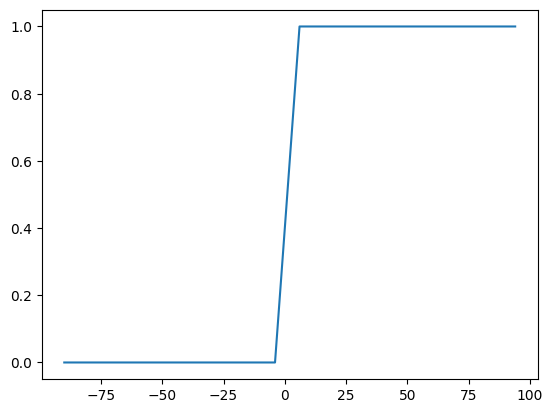

In [ ]:
plt.plot(x,step_function(Linear(x,w,b)))

In [ ]:
# prompt: generate perceptron code

import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # update weights
                update = self.lr * (y_[i] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                print(f"end of {_+1} epoch, row id {i+1}, w is {self.weights}, b is {self.bias}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [ ]:
p = Perceptron()

In [ ]:
x

array([[-90],
       [-74],
       [-61],
       [ -4],
       [  6],
       [ 29],
       [ 42],
       [ 77],
       [ 93],
       [ 94]])

In [ ]:
y = [0,0,0,0,0,1,1,1,1,1]

In [ ]:
p.fit(x,y)

In [ ]:
x.shape

(10, 1)

In [ ]:
50*10

500

In [ ]:
p.weights

array([0.03])

In [ ]:
p.bias

-0.2700000000000001

In [ ]:
p.predict(x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=3&seed=0.06721&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

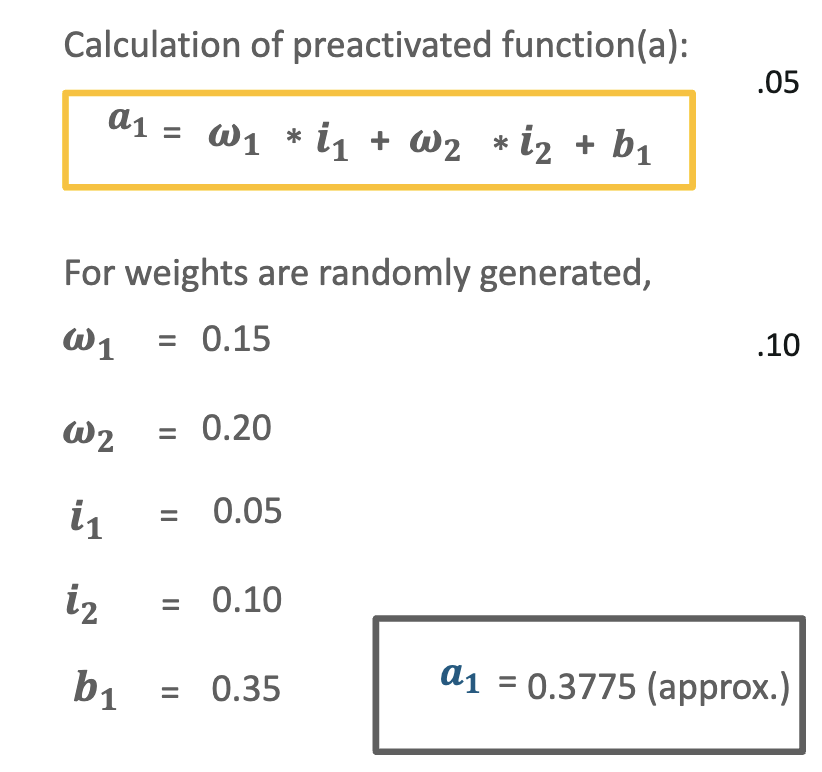

In [1]:
(0.05*.15) + (0.1*0.2) + 0.35

0.3775

In [2]:
import numpy as np
1/(1+np.exp(-0.3775))

0.5932699921071872

In [3]:
import numpy as np
1/(1+np.exp(-0.3925))

0.596884378259767

In [4]:
1/(1+np.exp(-1.10))

0.7502601055951177